# 統計的学習の基礎 3章　3.5.2 部分最小２乗法
書籍の結果と値が少し乖離があるので確認中です。下記の内容は信頼性が低い状態ですのでご注意ください。すみません・・・(>_<)  
→ グラフ描いてみたら間違っては無い気がしてきました(^ー^) ただし、新しいデータに対して予測するやり方について調査中です。

In [1]:
from __future__ import division
import numpy as np
import numpy.random as rd
import pandas as pd
from scipy import stats as st
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="darkgrid", palette="muted", color_codes=True)

In [2]:
debug_flg = False

In [3]:
def RMSE(y, y_hat):
    assert len(y) == len(y_hat)
    y = np.asanyarray(y)
    y_hat = np.asanyarray(y_hat)
    return np.sqrt(np.mean((y-y_hat)**2))

In [4]:
def print_data(label, data):
    global debug_flg
    if debug_flg:
        print label, data

## 前立腺癌データ

In [5]:
# Data from http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data
df = pd.read_csv("prostate.tsv", sep="\t", index_col=0)
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [6]:
print df.keys()
df.drop("train", axis=1, inplace=True)

Index([u'lcavol', u'lweight', u'age', u'lbph', u'svi', u'lcp', u'gleason',
       u'pgg45', u'lpsa', u'train'],
      dtype='object')


In [7]:
y = df.lpsa.values
df.drop("lpsa", axis=1, inplace=True)
X = df.values

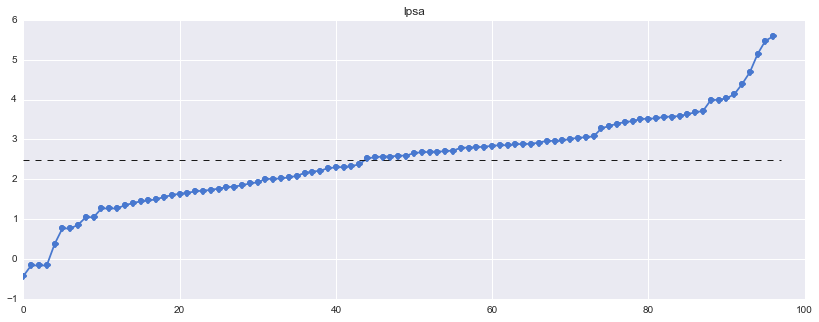

In [8]:
plt.figure(figsize=(14,5))
plt.plot(range(len(y)),y,marker="o")
y_mean = np.mean(y)
plt.plot([0,len(y)],[y_mean, y_mean],"k--", lw=1)
plt.title("lpsa")

### アルゴリズム 3.3 :    部分最小２乗法 (p95)

In [9]:
# 1.
n   = X.shape[0]
dim = X.shape[1]
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)        # Xの標準化

# initialize
y_hat = np.zeros((dim+1, n))
z     = np.zeros((dim, n))
X_hat = np.zeros((dim+1, X.shape[0], X.shape[1]))
phi   = np.zeros((dim, dim))
theta = np.zeros(dim)

y_hat[0] = np.ones(n) * np.mean(y)
X_hat[0] = X

In [10]:
# 2.
for m in range(dim):
    print_data("loop: {}".format(m),"")
    # (a)
    phi[m] = np.dot(X_hat[m].T, y)
    print_data("phi: ", phi[m])
    z[m] = np.dot(X_hat[m], phi[m])
    print_data("z", z[m])
    
    # (b)
    z2 = np.dot(z[m],z[m])
    theta[m] = np.dot(y, z[m])/z2
    print_data("theta:", theta[m])
    
    # (c)
    y_hat[m+1] = y_hat[m] + theta[m]*z[m]
    print_data("y_hat[m+1]:", y_hat[m+1])
    
    # (d)
    for j in range(dim):
        X_hat[m+1][:,j] = X_hat[m][:,j] - (np.dot(X_hat[m][:,j], z[m])/z2) * z[m]
    print_data("X_hat[m+1]", X_hat[m+1])
    

RMSE[0]: 1.14836351013
RMSE[1]: 0.77360339431
RMSE[2]: 0.693330891787
RMSE[3]: 0.676361810073
RMSE[4]: 0.668431371384
RMSE[5]: 0.666443476028
RMSE[6]: 0.666287656244
RMSE[7]: 0.666259446735
RMSE[8]: 0.666259126842


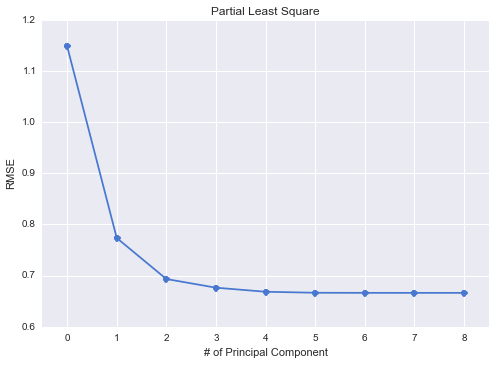

In [11]:
# p75 図3.7
error = np.zeros(dim+1)
for m in range(dim+1):
    error[m] = RMSE(y, y_hat[m])
    print "RMSE[{}]:".format(m), error[m]
    
plt.plot(error, "o-")
plt.xlim(-.5,8.5)
plt.xticks(range(9))
plt.ylabel("RMSE")
plt.xlabel("# of Principal Component")
plt.title("Partial Least Square")
plt.show()

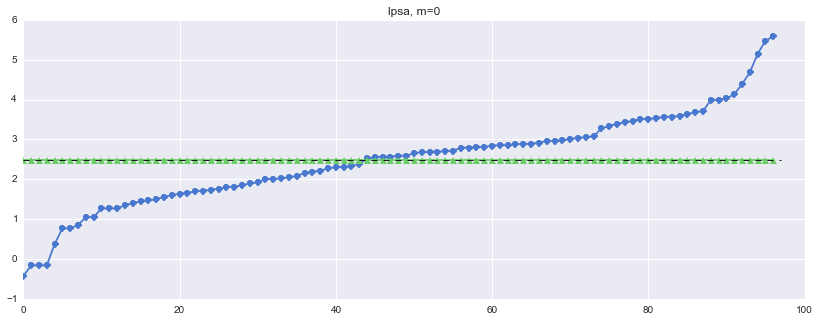

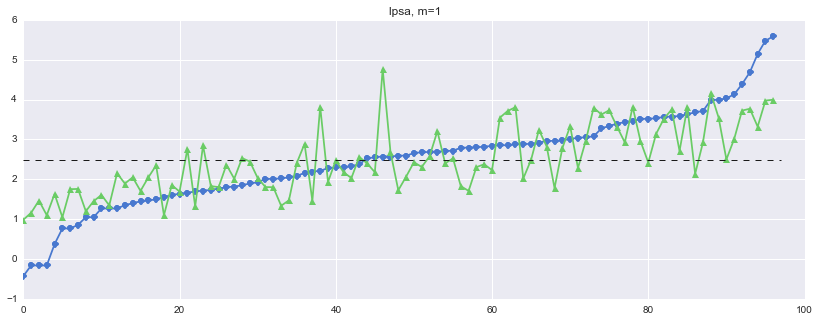

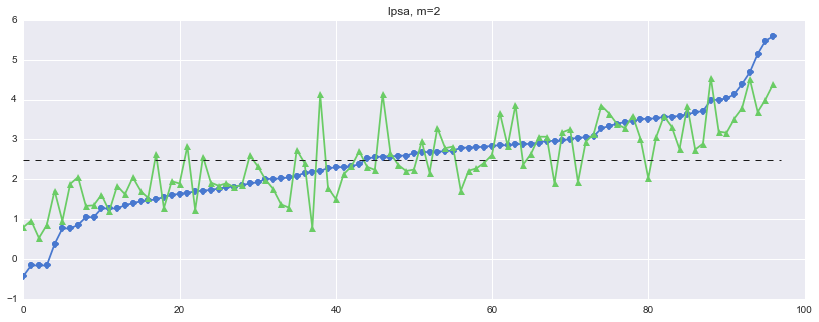

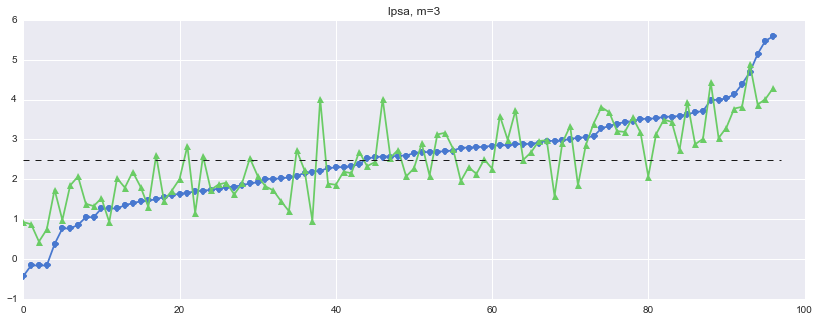

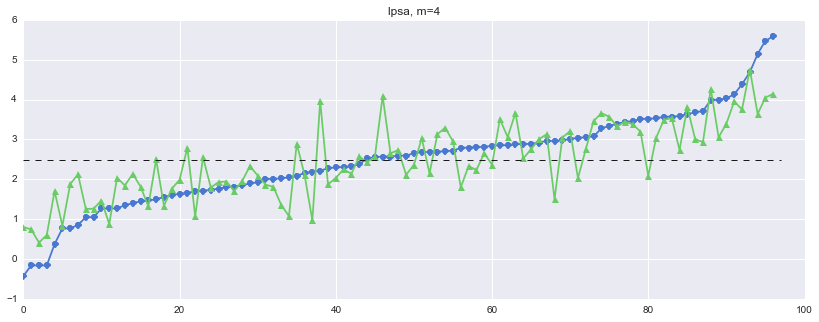

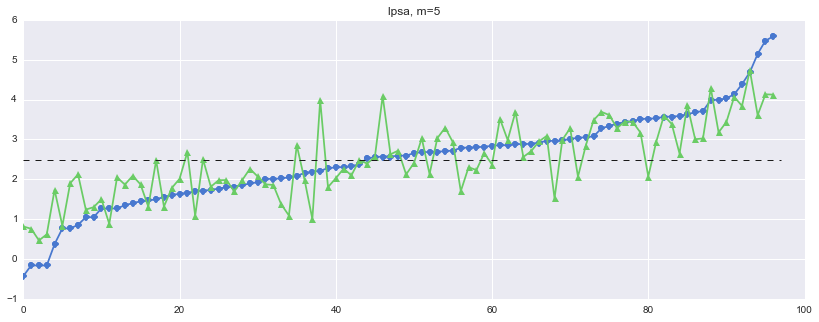

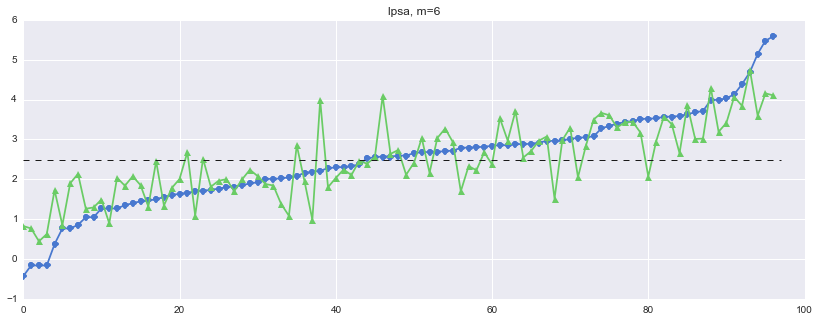

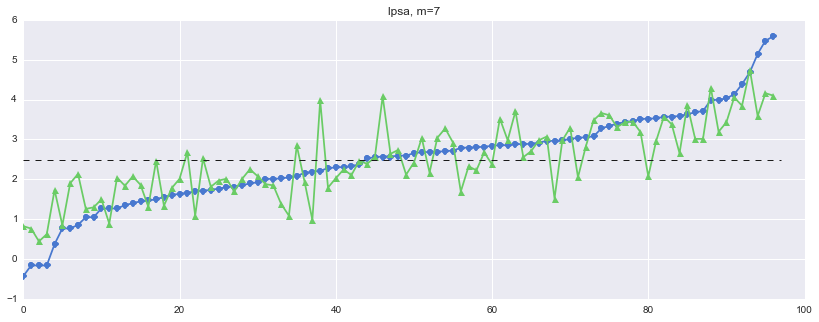

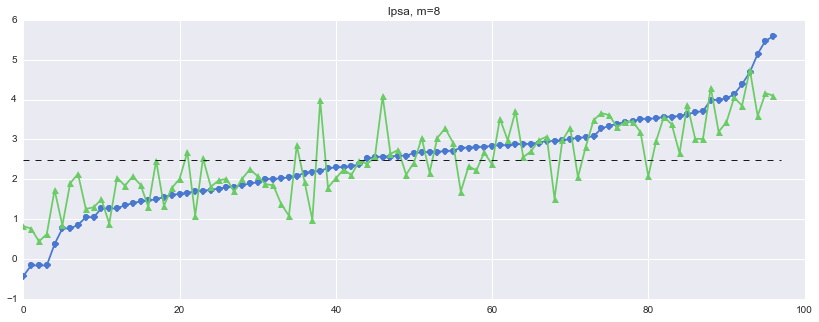

In [12]:
for m in range(9):
    plt.figure(figsize=(14,5))
    plt.plot(range(len(y)),y,marker="o")
    plt.plot(range(len(y)),y_hat[m],marker="^",c="g")
    y_mean = np.mean(y)
    plt.plot([0,len(y)],[y_mean, y_mean],"k--", lw=1)
    plt.title("lpsa, m={}".format(m))

## 通常の線形回帰

coef: [ 0.          0.6617092   0.26510309 -0.15737767  0.13958604  0.31369926
 -0.14751935  0.03536545  0.1250701 ]


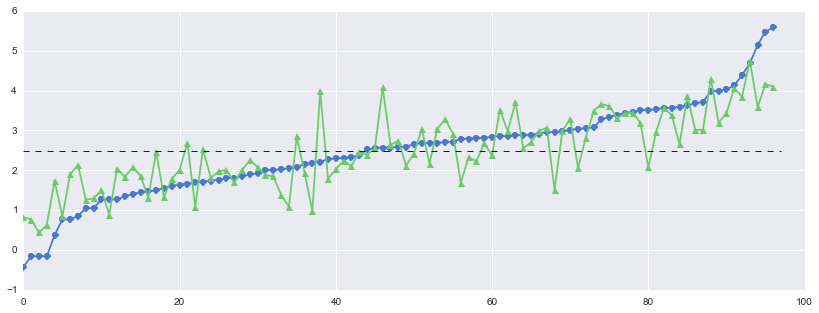

In [13]:
clf = LinearRegression()
clf.fit(np.column_stack([np.ones(len(X)),X]), y)
print "coef:", clf.coef_

plt.figure(figsize=(14,5))
plt.plot(range(len(y)),y,marker="o")
plt.plot(range(len(y)),clf.predict(np.column_stack([np.ones(len(X)),X])),marker="^",c="g")
y_mean = np.mean(y)
plt.plot([0,len(y)],[y_mean, y_mean],"k--", lw=1)
plt.show()